In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import hgc_testbeam as hgc
import math

In [34]:
hgc.runlist

,Run,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration
136,384,2018-10-13 10:20:00,11958,electron,250,22b,1
137,385,2018-10-13 10:31:00,10161,electron,250,22b,1
138,386,2018-10-13 10:45:00,12097,electron,250,22b,1
140,389,2018-10-13 11:10:00,10305,electron,250,22b,1
141,390,2018-10-13 11:19:00,10880,electron,250,22b,1
142,391,2018-10-13 11:31:00,3326,electron,250,22b,1
143,392,2018-10-13 11:35:00,10204,electron,250,22b,1
144,393,2018-10-13 11:48:00,5196,electron,250,22b,1
145,397,2018-10-13 12:18:00,13521,electron,250,22b,1
146,398,2018-10-13 12:37:00,12614,electron,250,22b,1


In [35]:
pion_runlist = hgc.runlist.query("Particle == 'pion'").query('Configuration == "22b"')
#pion_runlist = hgc.runlist.query("Particle == 'pion'").query('Configuration == "22b"').groupby("Energy").apply(lambda x : x.iloc[[1,2,3,4,5,6]])
print (pion_runlist)
energy = pion_runlist.Energy.values

     Run                 Date  Nevents Particle  Energy Configuration  \
244  512  2018-10-14 16:38:00    20000     pion     300           22b   
245  513  2018-10-14 17:01:00    13480     pion     300           22b   
246  515  2018-10-14 17:16:00    13866     pion     300           22b   
247  516  2018-10-14 17:34:00    11021     pion     300           22b   
248  517  2018-10-14 17:46:00    10887     pion     300           22b   
249  518  2018-10-14 18:11:00    11999     pion     300           22b   
250  519  2018-10-14 18:57:00     6141     pion     300           22b   
251  520  2018-10-14 19:06:00    12220     pion     300           22b   
252  521  2018-10-14 19:19:00    10594     pion     300           22b   
253  522  2018-10-14 19:44:00     5513     pion     300           22b   
254  523  2018-10-14 19:53:00    13000     pion     300           22b   
256  525  2018-10-14 20:43:00    10392     pion      80           22b   
258  527  2018-10-14 20:58:00    10644     pion    

In [36]:
run_numbers = pion_runlist.Run.values
X0_meanvalue = []
X0_variance = []
for run in run_numbers:
    hdf = hgc.load_run(run, columns = ["beamEnergy","event", "rechit_layer", "rechit_X0", "rechit_energy"])
    total_sum = hdf.groupby(["event", "rechit_X0"]).sum()
    total_sum = total_sum.reset_index()
    total_sum = total_sum.groupby("rechit_X0").median()
    total_sum = total_sum.reset_index()
    total_sum["rechit_energy"] = total_sum["rechit_energy"]/total_sum["rechit_energy"].sum()
    rechitX0_sum = total_sum.rechit_X0
    rechit_energy_sum = total_sum.rechit_energy
    rechitX0_mean = (rechitX0_sum*rechit_energy_sum).sum()
    #rechitX0_variance = rechitX0.rechit_X0.std()
    X0_meanvalue.append(rechitX0_mean)
print (X0_meanvalue)
print (energy)
df = pd.DataFrame({
    "energy" : energy,
    "X0_meanvalue" : X0_meanvalue,
    })
df.to_csv("Showermaximum_Beamenergy_plotting_pions_22b.csv")
    #X0_variance.append(rechitX0_variance)
X0_meanvalue

[29.69991473888804, 29.845781422901084, 29.326987967253022, 29.971929381590453, 29.569041887487575, 29.691069841609803, 29.573440196173443, 29.608020492433219, 29.943898966210604, 29.392638685805196, 29.357578368139162, 28.866997861630047, 28.248567412974779, 28.783864136219258, 28.376607891904655, 28.338478251948722, 28.574327560927486, 28.541243173704018, 29.189207994202384, 28.892377529436491, 28.552140419385161, 28.274160208142831, 28.611105011324632, 28.446821741869442, 29.762306163860369, 29.388049011971976, 29.423827668521376, 29.677601291092117, 29.166030627936998, 29.826657328861302, 30.181961792145103, 29.263343433176516, 29.710034340291514, 29.939993185936707, 29.035422664522194, 28.481421676956582, 28.721397898212075, 29.109890482422664, 28.784128610861487, 29.251993549671024, 29.17557237843657, 28.475450434010941, 28.730745630911088, 28.59197745892056, 29.557094893606667, 29.967485462205836, 29.834775366984537, 30.21195965506282, 29.184534861514752, 30.289571099483759, 30.

[29.69991473888804,
 29.845781422901084,
 29.326987967253022,
 29.971929381590453,
 29.569041887487575,
 29.691069841609803,
 29.573440196173443,
 29.608020492433219,
 29.943898966210604,
 29.392638685805196,
 29.357578368139162,
 28.866997861630047,
 28.248567412974779,
 28.783864136219258,
 28.376607891904655,
 28.338478251948722,
 28.574327560927486,
 28.541243173704018,
 29.189207994202384,
 28.892377529436491,
 28.552140419385161,
 28.274160208142831,
 28.611105011324632,
 28.446821741869442,
 29.762306163860369,
 29.388049011971976,
 29.423827668521376,
 29.677601291092117,
 29.166030627936998,
 29.826657328861302,
 30.181961792145103,
 29.263343433176516,
 29.710034340291514,
 29.939993185936707,
 29.035422664522194,
 28.481421676956582,
 28.721397898212075,
 29.109890482422664,
 28.784128610861487,
 29.251993549671024,
 29.17557237843657,
 28.475450434010941,
 28.730745630911088,
 28.59197745892056,
 29.557094893606667,
 29.967485462205836,
 29.834775366984537,
 30.211959655062

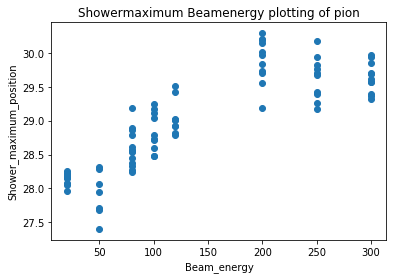

In [58]:
plt.scatter(df.energy, df.X0_meanvalue)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of pion")
plt.show()

 
1.696 x + 25.54


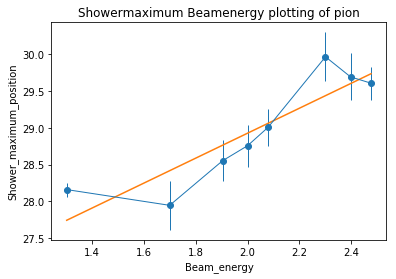

In [55]:
X0_meanvalue = df.groupby("energy").X0_meanvalue.median()
X0_meanvalue = X0_meanvalue.reset_index()
X0_variance = df.groupby("energy").X0_meanvalue.std()
X0_variance = X0_variance.reset_index()
beamenergy = df.groupby("energy").median()
beamenergy = beamenergy.reset_index()
Beamenergy = []
for energies in beamenergy.energy:
    energies = math.log(energies,10)
    Beamenergy.append(energies)
plt.errorbar(Beamenergy, beamenergy.X0_meanvalue, yerr=X0_variance.X0_meanvalue, fmt="o", linestyle='-', linewidth=1)
plt.xlabel("Beam_energy")
plt.ylabel("Shower_maximum_position")
plt.title("Showermaximum Beamenergy plotting of pion")
z1=np.polyfit(Beamenergy, beamenergy.X0_meanvalue,1)
p1=np.poly1d(z1)
print(p1)
yvals=p1(Beamenergy)
plot1=plt.plot(Beamenergy, yvals)
#plt.xlim(0,2.5)
#plt.ylim(0,12)
plt.show()